## PROBLEM STATEMENT
### TO DETECT A PHISHING WEBSITE USING MACHINE LEARNING
### (Supervised classification problem)

### PHISHING:
Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels. 
Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.

#Dataset is downloaded from Kaggle:https://www.kaggle.com/ahmednour/website-phishing-data-set


## We can define the machine learning workflow in 5 stages.
### a)	Gathering data
### b)	Data pre-processing
### c)	Researching the model that will be best for the type of data
### d)	Training and testing the model
### e)	Evaluation


### 1. Gathering Data
### The process of gathering data depends on the type of project we desire to make, if we want to make an ML project that uses real-time data, then we can build an IoT system that using different sensors data. The data set can be collected from various sources such as a file, database, sensor and many other such sources but the collected data cannot be used directly for performing the analysis process as there might be a lot of missing data, extremely large values, unorganized text data or noisy data. Therefore, to solve this problem Data Preparation is done.
### We have used some free data sets which are present on  Kaggle and UCI Machine learning Repository for making Machine learning models. 


### 2. Data pre-processing
#### Data pre-processing is one of the most important steps in machine learning. It is the most important step that helps in building machine learning models more accurately. We have used 80/20 rule for our data, means we have spent 80% time for data pre-processing and 20% time to actually perform the analysis.
#### Why do we need it?
#### Most of the real-world data is messy, some of these types of data are:
#### 1. Missing data: Missing data can be found when it is not continuously created or due to technical issues in the application (IOT system).
#### 2. Noisy data: This type of data is also called outliers, this can occur due to human errors (human manually gathering the data) or some technical problem of the device at the time of collection of data.
#### 3. Inconsistent data: This type of data might be collected due to human errors (mistakes with the name or values) or duplication of data.


### 3. Researching the model that will be best for the type of data
#### Our main goal is to train the best performing model possible, using the pre-processed data.
#### Supervised Learning:
#### In Supervised learning, an AI system is presented with data which is labelled, which means that each data tagged with the correct label. The supervised learning is categorized into 2 other categories which are “Classification” and “Regression”.
#### Unsupervised Learning:
#### In unsupervised learning, an AI system is presented with unlabeled, un-categorized data and the system’s algorithms act on the data without prior training. The output is dependent upon the coded algorithms. Subjecting a system to unsupervised learning is one way of testing AI. The unsupervised learning is categorized into 2 other categories which are “Clustering” and “Association”.



### 4. Training and testing the model on data
#### For training a model we initially split the model into 3 three sections which are ‘Training data’, ‘Validation data’ and ‘Testing data’.
#### You train the classifier using ‘training data set’, tune the parameters using ‘validation set’ and then test the performance of your classifier on unseen ‘test data set’. An important point to note is that during training the classifier only the training and/or validation set is available. The test data set must not be used during training the classifier. The test set will only be available during testing the classifier.



### 5. Evaluation
#### Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future.



In [24]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
#supressing warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#importing the data set
df = pd.read_csv("C:/Users/DEll/Desktop/MACHINE LEARNING PROJECTS/PISHING WEB/dataset.csv")

In [4]:
#exploring the dataset.
print("Shape of the data:",df.shape)

Shape of the data: (11055, 32)


In [5]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [8]:
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [9]:
#our target coloum is 'RESULT' column
df.Result.unique()


array([-1,  1], dtype=int64)

In [10]:
df.Result.count()

11055

In [11]:
df['Result'].value_counts()
# 1 means not a phishing website.
# -1 means a phishing website.


 1    6157
-1    4898
Name: Result, dtype: int64

In [12]:
#missing values
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [13]:
# Replacing -1 with 0 in the target variable
# 1 means not a phishing website.
#-1 means a phishing website.
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])
Y = df['Result']
X = df.drop(columns=['Result'])

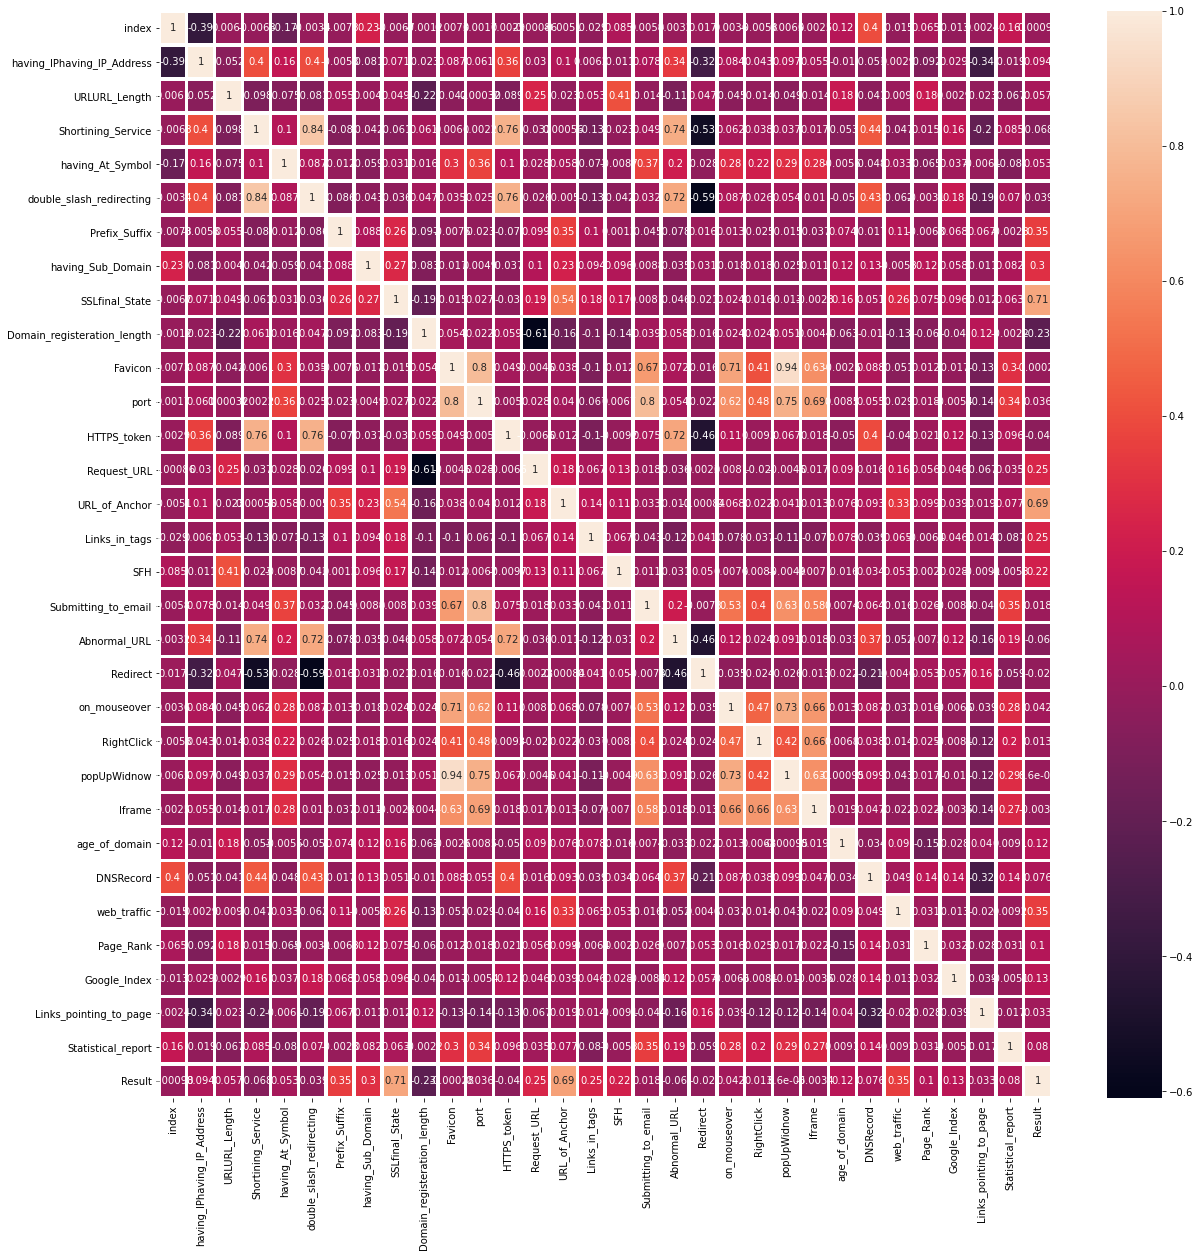

In [14]:
# checking the correlation between the features
corr = df.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

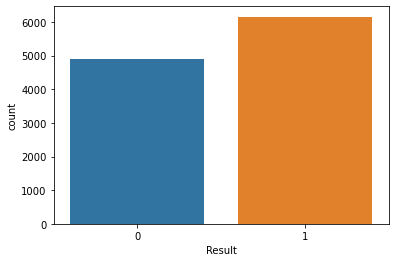

In [86]:
sns.countplot(df['Result'])

In [15]:
#importing train-test split from Sklearn to split the dataset
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [16]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.8,random_state=2)

# LOGISTIC REGRESSION

In [17]:
#training the dataset
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
model_1=classifier.fit(train_X,train_Y)

In [18]:
#prediction 
logres_pred=model_1.predict(test_X)


In [19]:
pred_prob = model_1.predict_proba(test_X)

np.around(pred_prob, decimals=2)

array([[0.43, 0.57],
       [1.  , 0.  ],
       [0.83, 0.17],
       ...,
       [0.67, 0.33],
       [0.91, 0.09],
       [1.  , 0.  ]])

In [20]:
#measuring performance
#accuracy
from sklearn import metrics
metrics.accuracy_score(test_Y,logres_pred)

0.9183627317955676

In [26]:
print(metrics.classification_report(test_Y,logres_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      3916
           1       0.92      0.94      0.93      4928

    accuracy                           0.92      8844
   macro avg       0.92      0.92      0.92      8844
weighted avg       0.92      0.92      0.92      8844



[[3494  300]
 [ 422 4628]]


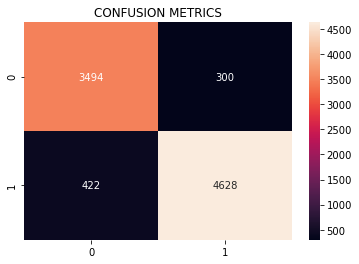

In [21]:
con_metric = metrics.confusion_matrix(logres_pred,test_Y)
print(con_metric)
sns.heatmap(con_metric,annot=True, fmt='d')
plt.title("CONFUSION METRICS")
plt.show()